In [1]:
%matplotlib inline
import fragmenter
import pandas as pd
from openeye import oechem
import matplotlib.pyplot as plt
import seaborn as sbn
import oenotebook as oenb
import numpy as np

In [2]:
mols = fragmenter.chemi.file_to_oemols('kinase_inhibitors_wbo.oeb')

In [3]:
# Add a couple more molecules with triple bonds to increase that peak
smiles = ['C#C', 'C#N', 'C#C-C-C#C', 'N#C-C-C#N', 'C#C-C=C-C#C', 'N#C-C=C-C#N', 'C#C-C#C-C#C',
         'C-C#C-C', 'N#C-C#C-C#N']

for sm in smiles:
    oemol = oechem.OEMol()
    oechem.OESmilesToMol(oemol, sm)
    oechem.OEAddExplicitHydrogens(oemol)
    try:
        charged_mol = fragmenter.chemi.get_charges(oemol, strict_stereo=False, strict_types=False)
    except RuntimeError:
        print(sm)
        continue
    mols.append(charged_mol)
    

In [4]:
wbos = {'C-C': [],
       'ring': [],
       'H': [],
       'N': [],
       'O': [],
       'halognes': [],
       'P': [],
       'S': [], 
       'all': [],
       'all_no_h': []}
missing_wbos = set()
for m in mols:
    for bond in m.GetBonds():
        if 'WibergBondOrder' not in bond.GetData():
            missing_wbos.add(m)
            continue
        wbo = bond.GetData('WibergBondOrder')
        wbos['all'].append(wbo)
        a1 = bond.GetBgn()
        a2 = bond.GetEnd()
        sym1 = oechem.OEGetAtomicSymbol(a1.GetAtomicNum())
        sym2 = oechem.OEGetAtomicSymbol(a2.GetAtomicNum())
        
        if bond.IsInRing():
            wbos['ring'].append(bond.GetData('WibergBondOrder'))
        if sym1 == 'N' or sym2 == 'N':
            wbos['N'].append(wbo)
        if sym1 == 'S' or sym2 == 'S':
            wbos['S'].append(wbo)
        if sym1 == 'P' or sym2 == 'P':
            wbos['P'].append(wbo)
        if sym1 == 'O' or sym2 == 'O':
            wbos['O'].append(wbo)
        if (sym1 == 'C' and sym2 == 'C') and not bond.IsInRing() and not sym1 == 'H' and not sym2 == 'H':
            wbos['C-C'].append(wbo)
        if sym1 == 'H' or sym2 == 'H':
            wbos['H'].append(wbo)
        if not sym1 == 'H' and not sym2 == 'H':
            wbos['all_no_h'].append(wbo)

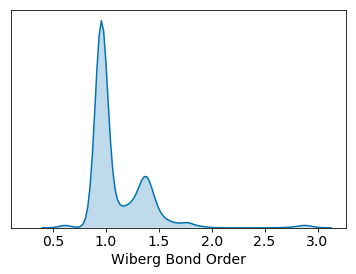

In [5]:
sbn.kdeplot(wbos['all'], shade=True, color=sbn.color_palette('colorblind')[0])
plt.xlabel('Wiberg Bond Order', fontsize=14)
plt.yticks([])
plt.xlim(0.1)
plt.xticks(fontsize=14)
#plt.tight_layout()
plt.savefig('wbo_dist_all.pdf', bbox_inches='tight')
#sbn.kdeplot(wbos['all_no_h'], shade=True)

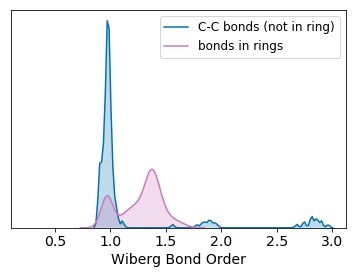

In [6]:
sbn.kdeplot(wbos['C-C'],shade=True, label='C-C bonds (not in ring)', color=sbn.color_palette('colorblind')[0])
sbn.kdeplot(wbos['ring'], shade=True, label='bonds in rings', color=sbn.color_palette('colorblind')[4])
plt.xlabel('Wiberg Bond Order', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks([])
plt.xlim(0.1)
plt.legend(fontsize=12)
plt.savefig('wbo_dist_carbon.pdf', bbox_inches='tight')
#sbn.kdeplot(wbos['all'], shade=True)

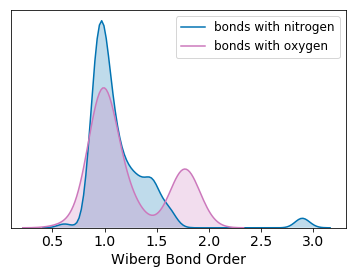

In [8]:
hfont = {'fontname':'Helvetica'}
sbn.kdeplot(wbos['N'],shade=True, label='bonds with nitrogen', color=sbn.color_palette('colorblind')[0])
sbn.kdeplot(wbos['O'], shade=True, label='bonds with oxygen', color=sbn.color_palette('colorblind')[4])
plt.xlabel('Wiberg Bond Order', fontsize=14)
plt.yticks([])
plt.xticks(fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0.1)
plt.savefig('wbo_dist_n_o.pdf', bbox_inches='tight')